## Figure 1: 

Surface pressure (black contours), total precipitation rate (colors), and cloud cover (gray shadings) for the cyclone simulation without radiation at (a) day 5 and (b) day 7. The blue lines indicate the dynamical tropopause as given by the 2 PVU contour on the 326 K isentrope.

---
@ Behrooz Keshtgar, KIT 2022

## 1- load python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings("ignore")

For reference, print package versions to screen:

In [2]:
print('xarrary:   ', xr.__version__)
print('numpy:     ', np.__version__)
import matplotlib; print('matplotlib:', matplotlib.__version__); del matplotlib

xarrary:    0.16.0
numpy:      1.19.1
matplotlib: 3.3.0


## 2- Loading datasets

In [5]:
# Dictionary for loading simulations
simdict = {
         'LC1-channel-4000x9000km-2km-0002' : {'res':'2km', 'radiation':0, 'rh':0.8}, # No radiation
          }
# loading 2d datasets
def load_simulations():
    ds_list = []
    for sim in list(simdict.keys()): 
        
        print('Working on loading data for', sim)
        # loading remapped datasets (0.5x0.5 r)
        path = '/work/bb1135/from_Mistral/bb1135/b381185/output/LC1_Limited_channel/icon-v.2.6.2.2_2km/sim_list_output/'+sim+'_remapped_0.5x0.5/'
        fname = path+'icon-atm2d*.nc'                                                                     
        ds_var = xr.open_mfdataset(fname)[['pres_sfc','clct','tot_prec']]
        ds_list.append(ds_var)
        del fname,ds_var

    return ds_list
#----------------------------------
ds_list_atm2d = load_simulations()
#----------------------------------
# also loading dataset interpolated on isentropic levels
def load_simulations():
    ds_list = []
    for sim in list(simdict.keys()): 

        print('Working on loading data for', sim)
        path = '/work/bb1135/from_Mistral/bb1135/b381185/output/LC1_Limited_channel/icon-v.2.6.2.2_2km/sim_list_output/'+sim+'_remapped_0.5x0.5/'
        # datasets
        fname = path+"pv_diag_calc_theta.nc" 
        ds_var = xr.open_dataset(fname)
        ds_list.append(ds_var)

    return ds_list
#----------------------------------
ds_list_pvdiag = load_simulations()
#----------------------------------------
#========================================
# Deriving related variables for plotting 

# isentropic pv as for depicting the dynamical tropopause evolution at 326 K 
ipv = ds_list_pvdiag[0].pv.sel(lev=326)

# smoothing IPV using 9 point averaging
#ipv_ysmoothed = mpcalc.smooth_n_point(ipv, 9, 1)

# Total precipitation rate
ds_list_atm2d[0]['tot_prec_dt'] = ds_list_atm2d[0]['tot_prec'].diff(dim='time', label='upper') #mm/hr

Working on loading data for LC1-channel-4000x9000km-2km-0002
Working on loading data for LC1-channel-4000x9000km-2km-0002


## 3- Plot

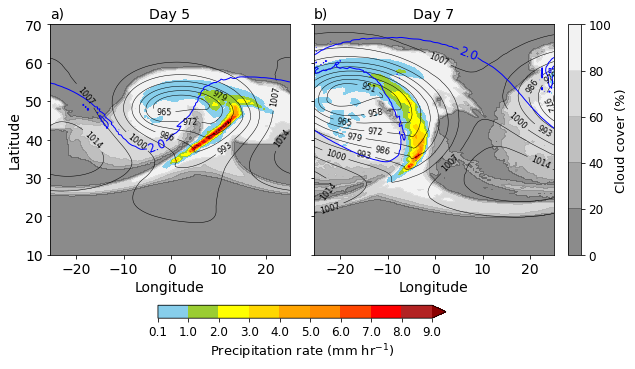

In [10]:
# Plot
# Note here that ICON outputs time dimension start from 1-10 days, in the analysis: 0-9 days

lat = ds_list_atm2d[0].lat
lon = ds_list_atm2d[0].lon

# defining color bar
cmap1 = mcolors.ListedColormap(['skyblue','yellowgreen','yellow','gold','orange','darkorange','orangered','red','firebrick'])
cmap1.set_over('darkred')

# precipitation rate contour
clevels = np.array([0.1,1,2,3,4,5,6,7,8,9])
#--------------------------------------------------------------------
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

i = 0

for ax in axes.flat:
    
    ax.tick_params(labelsize=14)
    ax.set_ylim([10, 70])
    ax.set_yticks(np.arange(10,80,10))
    ax.set_xticks(np.arange(-20,30,10))
    
    if i == 0:
        #cloud cover
        im1 = ax.contourf(lon-38,lat,ds_list_atm2d[0]['clct'].sel(time='20210106')
                          ,cmap=plt.cm.get_cmap('gray'),levels=np.arange(0.0,120,20),alpha=0.5)
        cbaxes = fig.add_axes([0.82, 0.1, 0.018, 0.8]) 
        cbar = fig.colorbar(im1, ax=ax,orientation='vertical',cax = cbaxes)
        cbar.set_label(label='Cloud cover (%)', size='13')
        cbar.ax.tick_params(labelsize=12)
        # precipitation rate
        im3 = ax.contourf(lon-38,lat,ds_list_atm2d[0]['tot_prec_dt'].sel(time='20210106')
                          ,cmap=cmap1,extend='max',levels=clevels)
        # surface pressure line
        cs1 = ax.contour(lon-38,lat,ds_list_atm2d[0]['pres_sfc'].sel(time='20210106')/100
                        ,colors='k',linewidths=0.5,levels=np.arange(930,1027,7))
        # dynamical tropopause contour
        cs2 = ax.contour(lon-38,lat,(ipv.sel(time=20210106)*1e6),[2],
                        linewidths=1,colors='b',linestyles='solid')
        
        ax.clabel(cs2,inline='true', inline_spacing=0.1,fontsize=12,fmt='%1.1f',manual=[(10, 0)])
        ax.clabel(cs1, inline=1, fontsize=8,fmt='%1.f')      

        ax.set_ylabel('Latitude', fontsize=14)
        ax.set_xlabel('Longitude', fontsize=14)
        ax.set_title('Day 5', fontsize=14)
        
        ax.text(0.0, 1.03, 'a)', transform=ax.transAxes, 
            size=14)
        
    if i == 1:
        #cloud cover
        im1 = ax.contourf(lon-38,lat,ds_list_atm2d[0]['clct'].sel(time='20210108')
                          ,cmap=plt.get_cmap('gray'),levels=np.arange(0.0,120,20),alpha=0.5)
        # precipitation rate
        im2 = ax.contourf(lon-38,lat,ds_list_atm2d[0]['tot_prec_dt'].sel(time='20210108')
                          ,cmap=cmap1,levels=clevels,extend='max')
        # surface pressure contours
        cs1 = ax.contour(lon-38,lat,ds_list_atm2d[0]['pres_sfc'].sel(time='20210108')/100
                        ,colors='k',linewidths=0.5,levels=np.arange(930,1027,7))
        # dynamical tropopause line
        cs2 = ax.contour(lon-38,lat,(ipv.sel(time=20210108)*1e6),[2],
                        linewidths=1,colors='b',linestyles='solid')

        ax.clabel(cs2,inline='true', inline_spacing=0.1,fontsize=12,fmt='%1.1f',manual=[(6, 60)])
        ax.clabel(cs1, inline=1, fontsize=8,fmt='%1.f')  
        
        ax.set_xlabel('Longitude', fontsize=14)
        ax.set_title('Day 7', fontsize=14)
        ax.set_yticklabels([])
        
        ax.text(0.0, 1.03, 'b)', transform=ax.transAxes, 
            size=14 )
        
    i = i + 1 
    
   
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.1, hspace=0.04)

cb_ax = fig.add_axes([0.25, -0.12, 0.4, 0.045]) # xcenter/ycenter/width/height
cbar = fig.colorbar(im3,cax=cb_ax,orientation='horizontal')

cbar.set_label(label='Precipitation rate (mm hr$^{-1}$)', size='13')
cbar.ax.tick_params(labelsize=12)

plt.savefig('figure1.pdf', bbox_inches = 'tight')
#plt.savefig('figure1.png', bbox_inches = 'tight',dpi=100)